In [1]:
!ls /zenith/ARC-AGI

LICENSE  README.md  apps  data


In [2]:
import psutil
import platform

def get_size(bytes, suffix="B"):
    """
    Scale bytes to its proper format
    e.g:
        1253656 => '1.20MB'
        1253656678 => '1.17GB'
    """
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor

# CPU information
print("="*40, "CPU Info", "="*40)
print("Physical cores:", psutil.cpu_count(logical=False))
print("Total cores:", psutil.cpu_count(logical=True))
# CPU frequencies
cpufreq = psutil.cpu_freq()
print(f"Max Frequency: {cpufreq.max:.2f}Mhz")
print(f"Min Frequency: {cpufreq.min:.2f}Mhz")
print(f"Current Frequency: {cpufreq.current:.2f}Mhz")
# CPU usage
print("CPU Usage Per Core:")
for i, percentage in enumerate(psutil.cpu_percent(percpu=True, interval=1)):
    print(f"Core {i}: {percentage}%")
print(f"Total CPU Usage: {psutil.cpu_percent()}%")

# Memory Information
print("="*40, "Memory Information", "="*40)
# get the memory details
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}")
print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}")
print(f"Percentage: {svmem.percent}%")

======================================== CPU Info ========================================
Physical cores: 8
Total cores: 8
Max Frequency: 0.00Mhz
Min Frequency: 0.00Mhz
Current Frequency: 2600.00Mhz
CPU Usage Per Core:
Core 0: 0.0%
Core 1: 0.0%
Core 2: 0.0%
Core 3: 0.0%
Core 4: 0.0%
Core 5: 0.0%
Core 6: 0.0%
Core 7: 0.0%
Total CPU Usage: 0.0%
======================================== Memory Information ========================================
Total: 906.32GB
Available: 906.14GB
Used: 153.53MB
Percentage: 0.0%


In [3]:
import json
import os
from typing import Dict, List, Any
from tqdm import tqdm

def read_arc_data(directory: str = 'ARC-AGI/data/evaluation', n: int = 50) -> Dict[str, Dict[str, List[Dict[str, Any]]]]:
    """
    Read ARC data from JSON files in the specified directory, limited to the first n files.

    Args:
    directory (str): Path to the directory containing JSON files.
    n (int): Number of files to read (default: 50).

    Returns:
    Dict[str, Dict[str, List[Dict[str, Any]]]]: A dictionary where keys are filenames
    and values are the contents of each JSON file.
    """
    arc_data = {}
    
    for filename in tqdm(os.listdir(directory)[:n], desc="Reading ARC data", unit="file"):
        if filename.endswith('.json'):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'r') as file:
                arc_data[filename] = json.load(file)
    
    return arc_data

# Example usage
arc_dataset = read_arc_data()
print(f"Number of tasks loaded: {len(arc_dataset)}")

Reading ARC data: 100%|██████████| 50/50 [00:06<00:00,  7.54file/s]

Number of tasks loaded: 50


In [25]:
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def original_arc_palette():
    return [
        "#000000", # 0 = black
        "#0074d9", # 1 = blue
        "#ff4136", # 2 = red
        "#2ecc40", # 3 = green
        "#ffdc00", # 4 = yellow
        "#aaaaaa", # 5 = gray
        "#f012be", # 6 = fuchsia
        "#ff851b", # 7 = orange
        "#7fdbff", # 8 = teal
        "#870c25", # 9 = brown
    ]
import matplotlib.pyplot as plt
import numpy as np

def display_grid(grid):
    plt.imshow(grid, cmap=plt.cm.colors.ListedColormap(original_arc_palette()), vmin=0, vmax=9)
    plt.axis('off')

def display_input_output(input_grid, output_grid):
    # Calculate the size of the larger grid
    max_size = max(len(input_grid), len(input_grid[0]), len(output_grid), len(output_grid[0]))
    
    # Calculate the figure size based on max_size and grid sizes
    K = 0.5  # Adjust this value to change the overall size of the plot
    input_width = len(input_grid[0]) * K
    output_width = len(output_grid[0]) * K
    total_width = input_width + output_width
    height = max(len(input_grid), len(output_grid)) * K
    
    figsize = (total_width, height)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    ax1.set_title("Input")
    ax1.imshow(input_grid, cmap=plt.cm.colors.ListedColormap(original_arc_palette()), vmin=0, vmax=9)
    ax1.axis('off')
    
    ax2.set_title("Output")
    ax2.imshow(output_grid, cmap=plt.cm.colors.ListedColormap(original_arc_palette()), vmin=0, vmax=9)
    ax2.axis('off')
    
    # Adjust the axes to center the grids and maintain pixel size
    ax1.set_xlim(-0.5, len(input_grid[0]) - 0.5)
    ax1.set_ylim(len(input_grid) - 0.5, -0.5)
    ax2.set_xlim(-0.5, len(output_grid[0]) - 0.5)
    ax2.set_ylim(len(output_grid) - 0.5, -0.5)
    
    # Set the aspect of the axes to be equal
    ax1.set_aspect('equal')
    ax2.set_aspect('equal')
    
    # Adjust the position of the subplots
    plt.subplots_adjust(left=0.05, right=0.95, wspace=0.1)
    
    plt.show()


Great. we can access the ARC dataset.

arc_dataset[json_file_name] = {
  'train': [
    {
      'input': input_grid,
      'output': output_grid
    },
    ...
  ],
  'test': [
    {
      'input': input_grid,
      'output': output_grid
    },
    ...
  ]
}

Task: 137f0df0.json
All training examples:


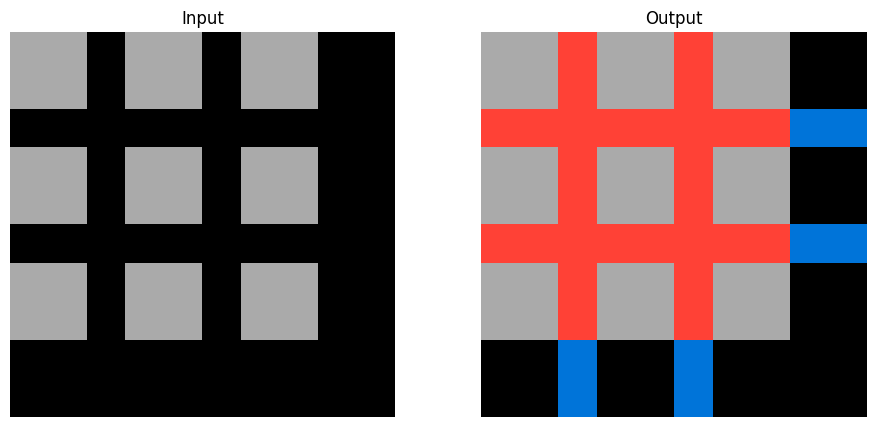

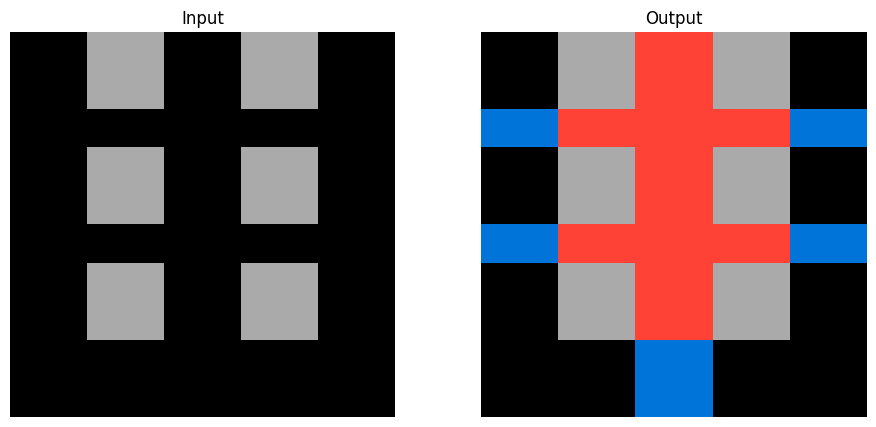

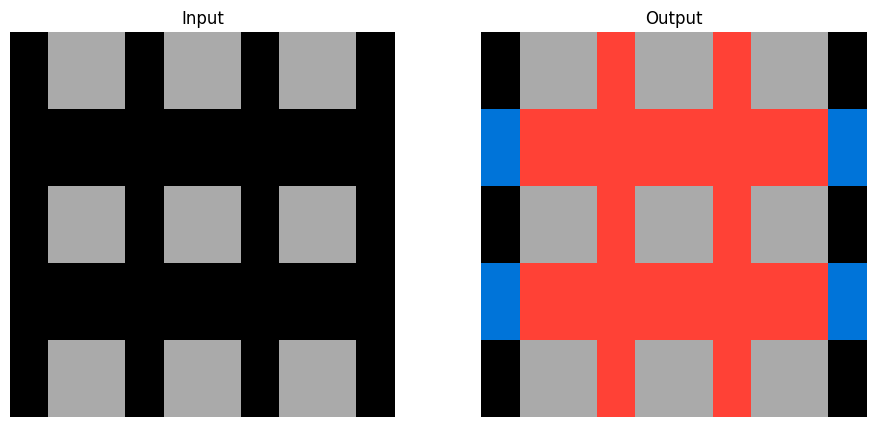

All test examples:


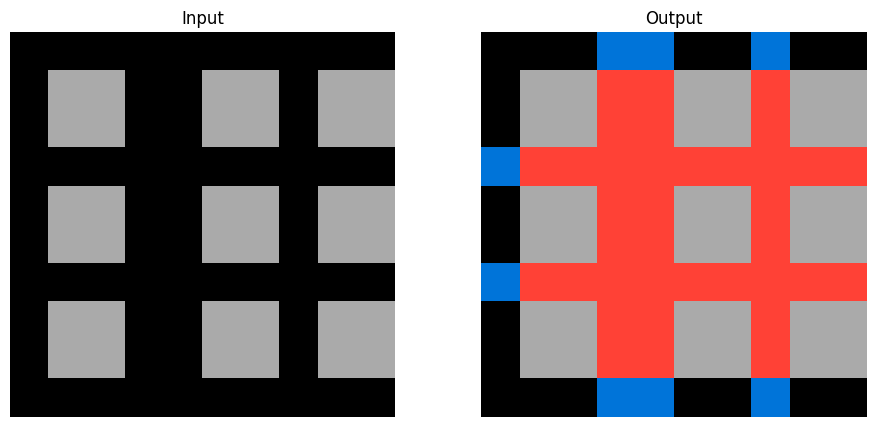

In [30]:
from dataclasses import dataclass
from typing import List, Dict, Any

@dataclass
class Example:
    input: List[List[int]]
    output: List[List[int]]

    def show(self):
        display_input_output(self.input, self.output)

@dataclass
class Task:
    name: str
    train: List[Example]
    test: List[Example]


def get_random_task():
  # Get a random item from the arc_dataset dictionary
  random_task_id = random.choice(list(arc_dataset.keys()))
  random_task = arc_dataset[random_task_id]
  return Task(name=random_task_id, train=[Example(input=example['input'], output=example['output']) for example in random_task['train']], test=[Example(input=example['input'], output=example['output']) for example in random_task['test']])

def display_arc_task(task: Task):
  print("Task:", task.name)

  # Display all training examples side by side
  print("All training examples:")
  for example in task.train:
      example.show()
  
  # Display all test examples side by side
  print("All test examples:")
  for example in task.test:
      example.show()

display_arc_task(get_random_task())

## ARC RL

There's a lot of interesting things that we can do with this dataset, even if we don't care about solving the ARC challenge.

For example, we can train an agent to draw simple shapes. Given an input and output, the agent should learn to draw in the least instructions possible. This will make it learn abstractions like "circle" and "square" etc. 

For example, consider a function like "draw five squares next to each other". Language approximates this complexity -- a long and complicated instruction can only be described in a long string, but a simple instruction is describable in a short string.

Now, why does it do that? 
This seems to be an emergent property of language - one that's very useful in real life.
The challenge is that we don't want to say the instructions in language - we want to say it in some form that translates well to actions. For example, if the executor were a paint program, we'd say things like "PAINT 0 10 RED SQUARE" instead of "draw a square with a red border". If the executor were a neural network, we'd perhaps pass some sequence of embeddings that represent the actions.

So in effect, we're trying to learn a language that can describe actions, which we can then use to control an executor.

This reminds me of VQ-VAE, or any of these quantized models. Instead of learning an end-to-end function to have inputs -> outputs, we're splitting the problem into two parts: the Abstractor and the Generator.


Let's consider our toy task of drawing shapes.

Abstractor - The goal of the abstractor is to come up with a sequence of continuous instructions to "control" the Generator. The Abstractor is rewarded by using the Generator well, ie, if the output matches the desired output. The Abstractor is the only agent that sees the raw input and raw output.
- One way of thinking about this is that the Abstractor is trying to form an understanding of what's there, and what to do. It's the reasoning agent, the learning agent, and more. But for all its strengths, it's limited by the Generator.

Generator - The goal of the generator is to take in a sequence of continuous instructions, and produce an output. In essence, this is the decoder part of a VAE. It can take continuous inputs, and produce shapes. 

An interseting way of looking at this bottleneck is if we have causal masking.

The Abstractor gets to see the input, and the currently generated tokens.




In [1]:
!ls

ARC-AGI  catcus.png  intro.ipynb
